# 

# Ineffectiveness of ``REGCA1.u``

In [1]:
import andes

In [2]:
%matplotlib inline

In [3]:
!andes misc --version

Python  3.12.0
andes   1.9.3.post7+g967a6b80
numpy   2.2.5
kvxopt  1.3.2.1
sympy   1.14.0
scipy   1.13.1
pandas  2.2.3
numba   0.61.2


In [4]:
andes.config_logger(20)

In [5]:
ss = andes.load(andes.get_case("kundur/kundur_wtds.xlsx"),
                setup=True, no_output=True)

Working directory: "/Users/jinningwang/work/demo/demo/misc"
> Loaded config from file "/Users/jinningwang/.andes/andes.rc"
> Loaded generated Python code in "/Users/jinningwang/.andes/pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 12 processes.


Saved generated pycode to "/Users/jinningwang/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.1868 seconds.
Parsing input file "/Users/jinningwang/work/andes/andes/cases/kundur/kundur_wtds.xlsx"...
REGCA1: unused data {'Iqmax': 999, 'Iqmin': -999}
WTDS: unused data {'fn': 60}
Input file parsed in 0.2100 seconds.
System internal structure set up in 0.0142 seconds.


In [6]:
ss.RenPlant.as_df()

,u,name,idx
0,1.0,REPCA1_1,1


In [7]:
ss.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.1110 seconds.
Numba compilation for power flow finished in 0.1007 seconds.
0: |F(x)| = 14.9282832
1: |F(x)| = 3.608627841
2: |F(x)| = 0.1701107882
3: |F(x)| = 0.002038626956
4: |F(x)| = 3.745104024e-07
Converged in 5 iterations in 0.0024 seconds.


True

In [8]:
_ = ss.TDS.init()

Numba compilation initiated with caching.
WTTQA1.PI_aw: adjusted limit <Temax>

Idx | Input | Old Limit
----+-------+----------
 1  | 7     | 1.200    


Initialization for dynamics completed in 0.2379 seconds.
Initialization was successful.


In [9]:
ss.TDS.config.no_tqdm = 1

ss.TDS.config.tf = 10
ss.TDS.run()

ss.REGCA1.set(src='u', attr='v', idx=1, value=0)

ss.TDS.config.tf = 50
ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-10 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


<Toggle 1>: Line.Line_8 status changed to 0 at t=2.0 sec.
<Toggle 2>: Line.Line_8 status changed to 1 at t=2.1 sec.


Simulation to t=10.00 sec completed in 0.7478 seconds.
Simulation to t=50.00 sec completed in 2.5167 seconds.


True

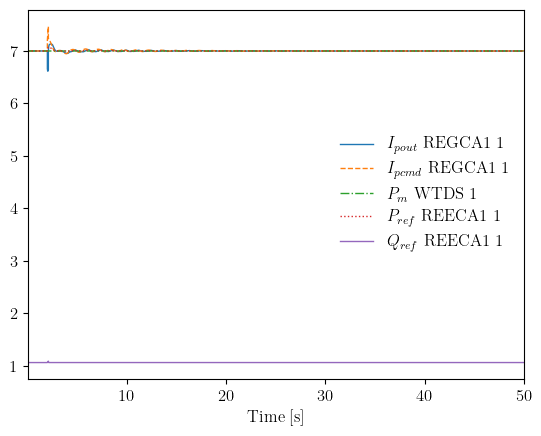

In [10]:
_ = ss.TDS.plt.plot([ss.REGCA1.Ipout,
                     ss.REECA1.Ipcmd,
                     ss.WTDS.Pm,
                     ss.REPCA1.Pext,
                     ss.REPCA1.Qext])

After tripping the REGCA1 by setting ``REGCA1.u = 0`` at 10s, the tripped ``REGCA1`` and attached ``REECA1``, ``WTDS``, and ``REPCA1`` seems still online.